In [2]:
import sys
sys.path.append('/user/andrassy/PyPPM/ppmpy')
import ppm
from matplotlib import pyplot as plt
%matplotlib nbagg

In [3]:
run_dir = '/user/dataA_rpod4/Oshell-768-no-burn-56.25xheat-dhp-E-YZ/prfs/'
rp_set = ppm.RprofSet(run_dir)

410 rprof files found in '/user/dataA_rpod4/Oshell-768-no-burn-56.25xheat-dhp-E-YZ/prfs/.
Dump numbers range from 0 to 409.
Reading history file '/user/dataA_rpod4/Oshell-768-no-burn-56.25xheat-dhp-E-YZ/prfs/Oshell00768-0000.hstry'.


In [4]:
rp_hst = rp_set.get_history()

In [5]:
rp_hst.get_variables()

['NDump',
 'NCycle',
 'time(secs)',
 'time(mins)',
 'dt(secs)',
 'Courant',
 'MachNoMax',
 'TotalFlops',
 'TimeStamp']

In [6]:
rp_hst.get('NDump')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<IPython.core.display.Javascript object>


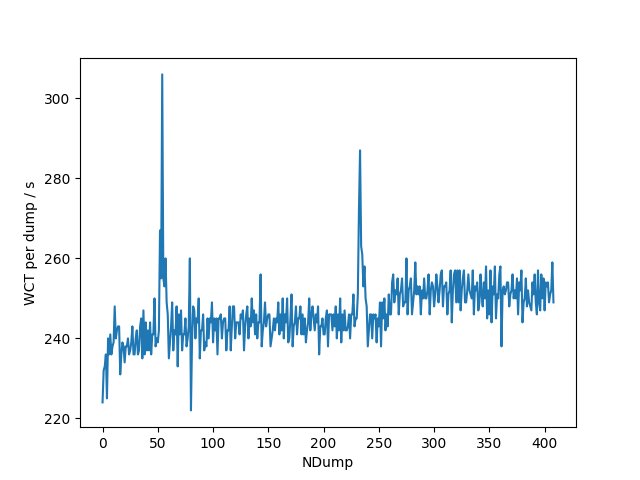

In [7]:
ifig=1; plt.close(ifig); plt.figure(ifig)
rp_hst.plot_wct_per_dump()

<IPython.core.display.Javascript object>


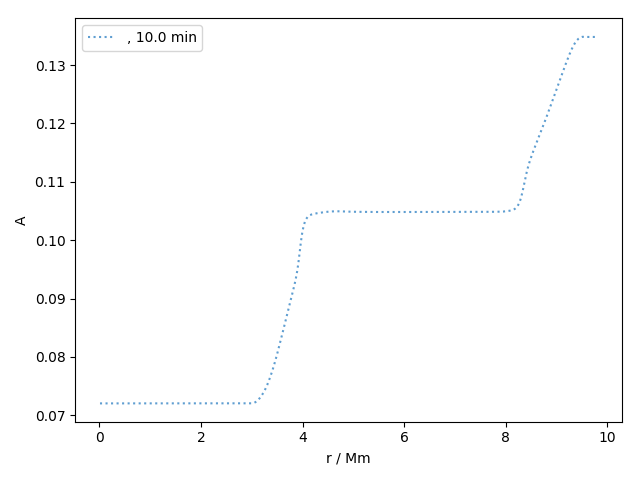

Dump 77 at t = 10.00 min is the closest to t = 10.00 min.
Dump 77 at t = 10.00 min is the closest to t = 10.00 min.
Dump 77 at t = 10.00 min is the closest to t = 10.00 min.


In [8]:
ifig=2; plt.close(ifig); plt.figure(ifig)
rp_set.plot_A(10.*60, num_type='t', resolution='l')

In [9]:
rp_set.get('FV', 10.*60, num_type='t', resolution='l')

Dump 77 at t = 10.00 min is the closest to t = 10.00 min.


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [10]:
rp_set.get('FV', 400, resolution='l')

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [11]:
rp = rp_set.get_dump(400)

In [12]:
rp.get_header_variables()

['t', 'Nx']

In [13]:
rp.get_hr_variables()

['R', 'Rho0', 'Rho1', 'P0', 'P1', 'FV0', 'FV', 'T9']

In [17]:
rp.get_lr_variables()

['R',
 'Ceul',
 'Mach#',
 '|U|',
 '|Ut|',
 'Ur',
 'FV',
 'A',
 'Ur',
 'RhoUr',
 'RhoUrUsq',
 'RhoUrH',
 'Enuc',
 'EnucSum',
 'Hburned',
 'FV',
 'Ur',
 'dUrRMS',
 'UrMin',
 'UrMax',
 '|Ut|',
 'd|Ut|RMS',
 '|Ut|Min',
 '|Ut|Max',
 '|U|',
 'd|U|RMS',
 '|U|Min',
 '|U|Max',
 'Mach',
 'dMachRMS',
 'MachMin',
 'MachMax',
 'T9',
 'dT9RMS',
 'T9Min',
 'T9Max',
 'Enuc',
 'dEnucRMS',
 'EnucMin',
 'EnucMax',
 'FV',
 'dFVrms',
 'FVMin',
 'FVMax',
 'Hburned',
 'dHburnedRMS',
 'HburnedMin',
 'HburnedMax',
 'RhoUrUsq',
 'dRhoUrUsqRMS',
 'RhoUrUsqMin',
 'RhoUrUsqMax',
 'EnucSum',
 'dEnucSumRMS',
 'EnucSumMin',
 'EnucSumMax',
 'Rho1/Rho0',
 'dRho1fRMS',
 'Rho1fMin',
 'Rho1fMax',
 'P1/P0',
 'dP1fRMS',
 'P1fMin',
 'P1fMax']

In [15]:
rp.get('Nx')

768

In [16]:
rp.get('T9', resolution='h')

array([3.4872723, 3.4872723, 3.4872735, 3.4872735, 3.4872737, 3.4872737,
       3.4872718, 3.4872718, 3.4872682, 3.4872682, 3.487272 , 3.487272 ,
       3.4872701, 3.4872701, 3.4872665, 3.4872665, 3.4872665, 3.4872665,
       3.4872684, 3.4872684, 3.487267 , 3.487267 , 3.4872653, 3.4872653,
       3.4872653, 3.4872653, 3.4872668, 3.4872668, 3.4872656, 3.4872656,
       3.4872663, 3.4872663, 3.4872661, 3.4872661, 3.4872658, 3.4872658,
       3.4872701, 3.4872701, 3.4872708, 3.4872708, 3.4872735, 3.4872735,
       3.4872739, 3.4872739, 3.4872766, 3.4872766, 3.4872787, 3.4872787,
       3.4872797, 3.4872797, 3.4872806, 3.4872806, 3.4872816, 3.4872816,
       3.4872832, 3.4872832, 3.4872842, 3.4872842, 3.4872861, 3.4872861,
       3.4872863, 3.4872863, 3.4872873, 3.4872873, 3.4872887, 3.4872887,
       3.4872892, 3.4872892, 3.4872904, 3.4872904, 3.4872916, 3.4872916,
       3.4872918, 3.4872918, 3.4872925, 3.4872925, 3.487293 , 3.487293 ,
       3.4872937, 3.4872937, 3.487294 , 3.487294 , 